## Fourier method for solving Poisson's equation

Solve

$$-u''(x)=f(x),\quad x\in (0,2\pi)$$

with periodic boundary condition. $f(x)=\sin(\sin x)\cos^2 x + \cos(\sin x)\sin x.$

Exact solution $u(x)=\sin(\sin x).$

┌ Info: Recompiling stale cache file /home/lin/.julia/compiled/v0.7/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1185


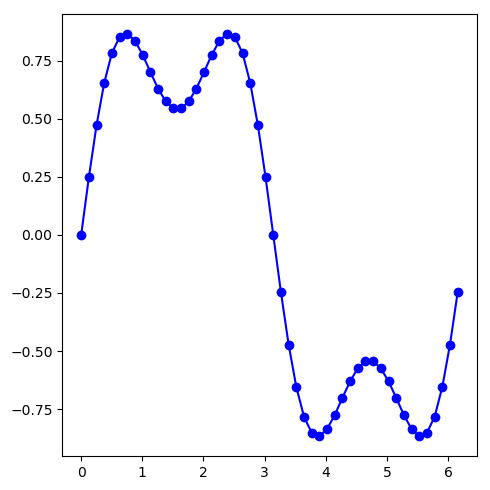

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c8cfdb7f0>

In [1]:
using LinearAlgebra
using FFTW

Ls = 2.0*pi;
Ns = 50
hs = Ls / Ns
xs = (0:Ns-1)*hs
f = sin.(sin.(xs)).*cos.(xs).^2 + cos.(sin.(xs)).*sin.(xs)
uexact = sin.(sin.(xs))

using PyPlot
figure(figsize=(5,5))
plot(xs,f,"b-o")

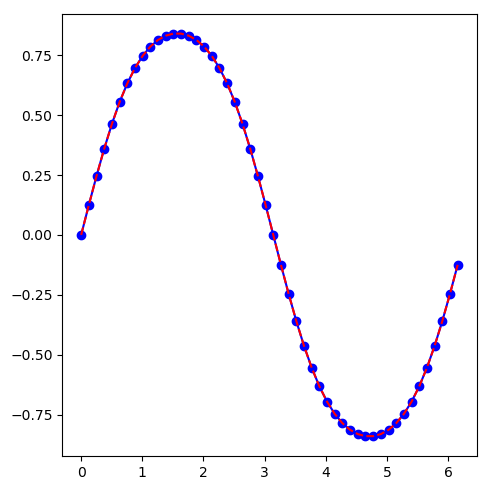

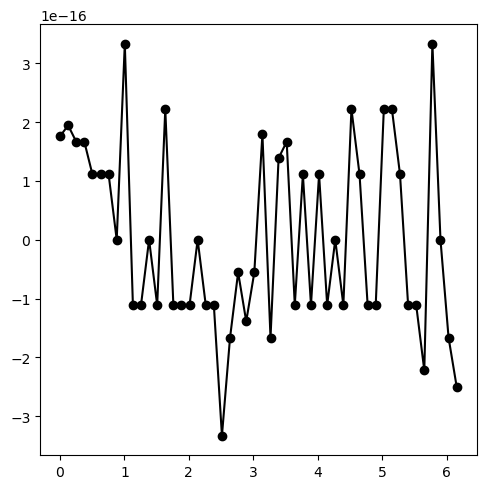

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c8ce45a58>

In [2]:
function FourierPoisson(Ls,Ns,f)
    hs = Ls/Ns
    fk = fft(f)
    kx = collect(union(0:div(Ns,2), -div(Ns,2)+1:-1))*2.0*pi/Ls
    uk = zeros(ComplexF64,size(f))
    uk[2:end] = fk[2:end] ./ (kx[2:end].^2)
    u = ifft(uk)
    return u
end


u = FourierPoisson(Ls,Ns,f)

figure(1,figsize=(5,5))
plot(xs,u,"b-o",xs,uexact,"r--")

figure(2,figsize=(5,5))
plot(xs,u-uexact,"k-o")


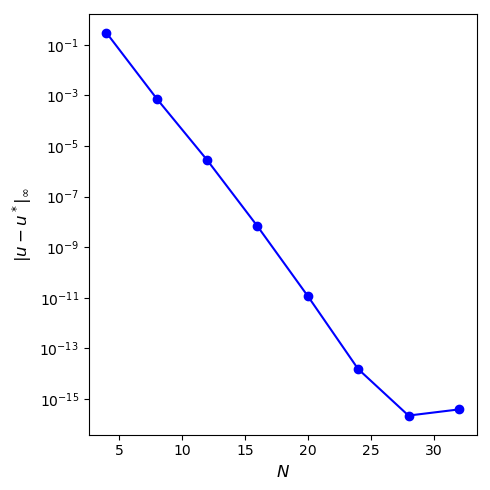

PyObject Text(33.9,0.5,'$|u-u^*|_{\\infty}$')

In [3]:
# Convergence rate. Measured by the max error 
NsList = 4:4:32
errList = zeros(size(NsList))
for l = 1 : length(NsList)
    Ns = NsList[l]
    hs = Ls / Ns
    xs = (0:Ns-1)*hs
    f = sin.(sin.(xs)).*cos.(xs).^2 + cos.(sin.(xs)).*sin.(xs)
    uexact = sin.(sin.(xs))
    
    u = FourierPoisson(Ls,Ns,f)
    errList[l] = maximum(abs.(u-uexact))
end

figure(1,figsize=(5,5))
semilogy(NsList,errList,"b-o")
xlabel(L"N")
ylabel(L"|u-u^*|_{\infty}")

In [6]:
## Compare with finite difference method
using SparseArrays

function FDPoisson(Ls,Ns,f)
    hs = Ls/Ns
    Ax = 1.0/hs^2*spdiagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))
    Ax[1,Ns] = -1.0/hs^2
    Ax[Ns,1] = -1.0/hs^2
    
    # u,h = cg(Ax,f,tol=1e-12,maxiter=10000)
    u = pinv(full(Ax))*f
    return u
end

FDPoisson (generic function with 1 method)

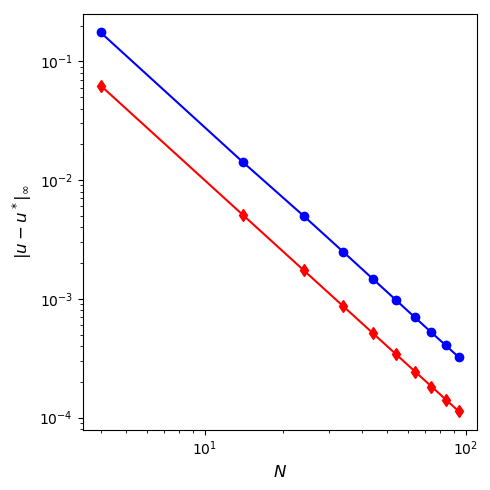

Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using SparseArrays` to your imports.
  likely near /home/lin/.julia/packages/IJulia/DL02A/src/kerne

PyObject Text(33.9,0.5,'$|u-u^*|_{\\infty}$')

In [7]:
# Convergence rate. Measured by the max error 
NsList = 4:10:100
errList = zeros(size(NsList))
for l = 1 : length(NsList)
    Ns = NsList[l]
    hs = Ls / Ns
    xs = (0:Ns-1)*hs
    f = sin.(sin.(xs)).*cos.(xs).^2 + cos.(sin.(xs)).*sin.(xs)
    uexact = sin.(sin.(xs))
    
    u = FDPoisson(Ls,Ns,f)
    errList[l] = maximum(abs.(u-uexact))
end

figure(1,figsize=(5,5))
loglog(NsList,errList,"b-o")
loglog(NsList,1.0./NsList.^2,"r-d")
xlabel(L"N")
ylabel(L"|u-u^*|_{\infty}")